In [182]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

!pip install imblearn

from sklearn.metrics import accuracy_score, f1_score,auc

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

In [4]:
df= pd.read_excel('C:/Users/Sonali.Sengupta/Desktop/Mortgage Insurance Cross Sell - Dataset & Case Description/Mortgage Insurance Cross Sell - Dataset & Case Description/Dataset - v1.xlsx') 
df.shape
df.head()
df.info()
df.isna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               16383 non-null  int64  
 1   Credit_Score                      16383 non-null  int64  
 2   Final_Grade                       16383 non-null  object 
 3   Term                              16383 non-null  int64  
 4   Net_Advance                       16383 non-null  float64
 5   APR                               16383 non-null  float64
 6   Loan_Type                         16383 non-null  object 
 7   Mosaic                            16383 non-null  int64  
 8   Mosaic_Class                      16383 non-null  int64  
 9   Time_at_Address                   16383 non-null  int64  
 10  Residential_Status                16383 non-null  object 
 11  Telephone_Indicator               16383 non-null  object 
 12  Numb

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,PPI_SINGLE,PPI_JOINT,PPI_LCI,Age Bucket,Credit Score Bucket,Time at Address Bucket,Time in Employment Bucket,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
16379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
16380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
16381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


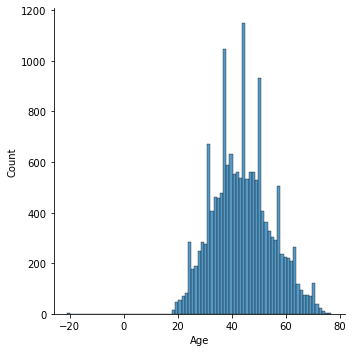

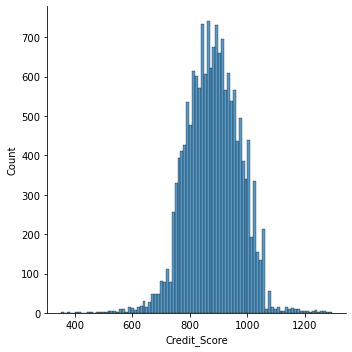

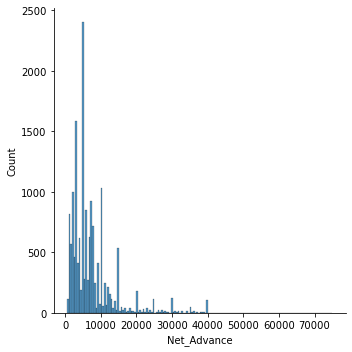

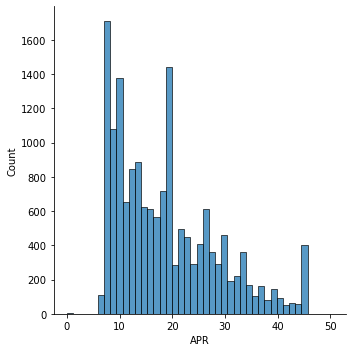

In [7]:
sns.displot(df['Age'])
sns.displot(df['Credit_Score'])
sns.displot(df['Net_Advance'])
sns.displot(df['APR'])

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Gender'>

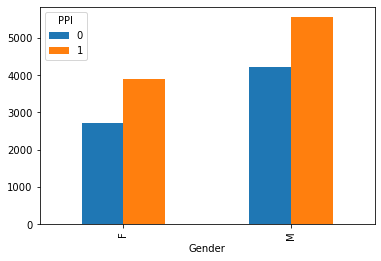

In [12]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Gender'],columns=LoanData['PPI'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and PPI
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Age Bucket'>

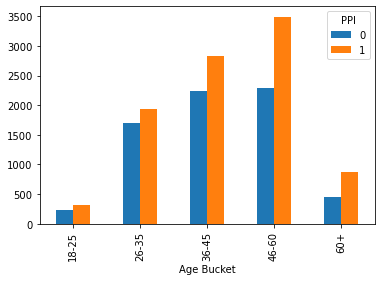

In [13]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Age Bucket'],columns=LoanData['PPI'])
print(CrosstabResult)
 
# Grouped bar chart between Age and PPI
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Credit Score Bucket'>

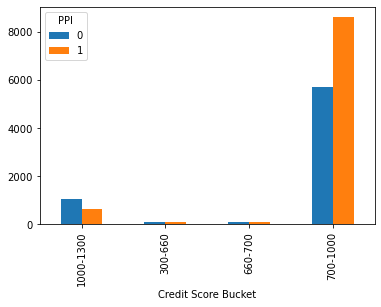

In [15]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Credit Score Bucket'],columns=LoanData['PPI'])
print(CrosstabResult)
 
# Grouped bar chart between Credit Score and PPI
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Loan_Type'>

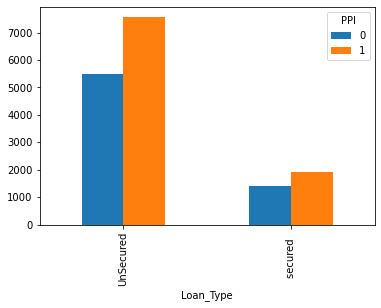

In [16]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Loan_Type'],columns=LoanData['PPI'])
print(CrosstabResult)
 
# Grouped bar chart between Loan Type and PPI
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Income_Range'>

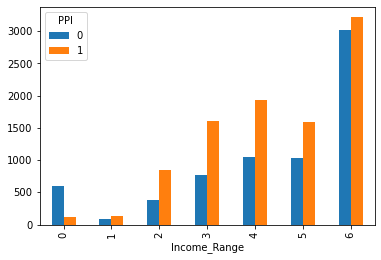

In [18]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Income_Range'],columns=LoanData['PPI'])
print(CrosstabResult)
 
# Grouped bar chart between Income and PPI
%matplotlib inline 
CrosstabResult.plot.bar()

In [19]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Other_Credit_Score_Card'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

KeyError: 'Other_Credit_Score_Card'

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Other_Credit_Store_Card'>

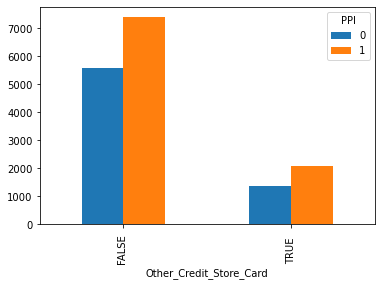

In [20]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Other_Credit_Store_Card'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Final_Grade'>

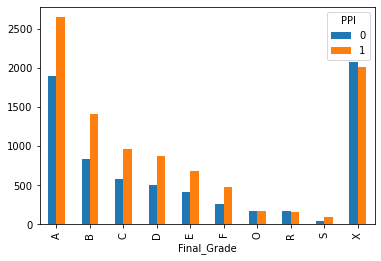

In [21]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Final_Grade'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Residential_Status'>

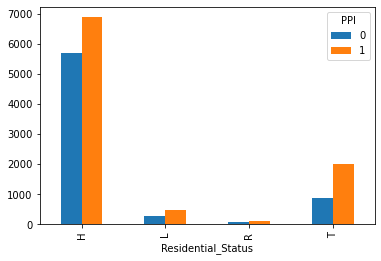

In [22]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Residential_Status'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Marital_Status'>

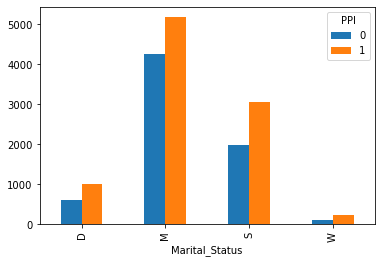

In [23]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Marital_Status'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Current_Account'>

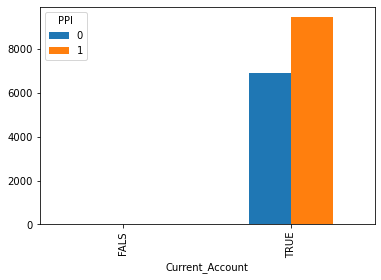

In [24]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Current_Account'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Insurance_Description'>

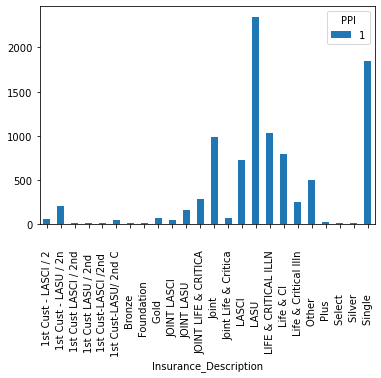

In [25]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Insurance_Description'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Time at Address Bucket'>

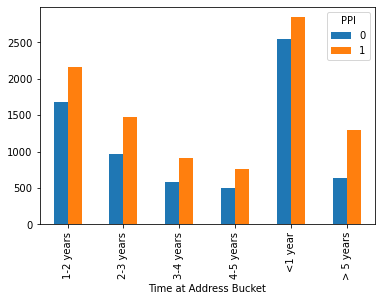

In [26]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Time at Address Bucket'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Total___of_accounts'>

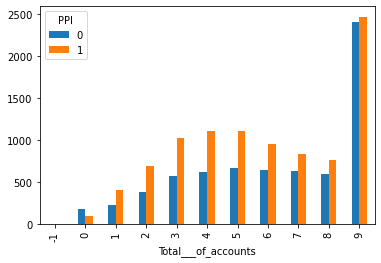

In [27]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Total___of_accounts'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

In [28]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['VISA_CARD'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

KeyError: 'VISA_CARD'

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='VISA_Card'>

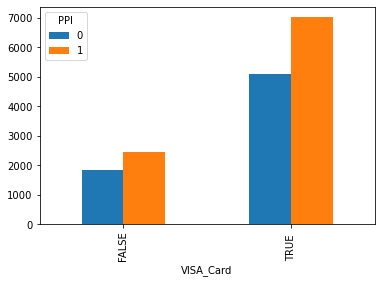

In [29]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['VISA_Card'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='American_Express'>

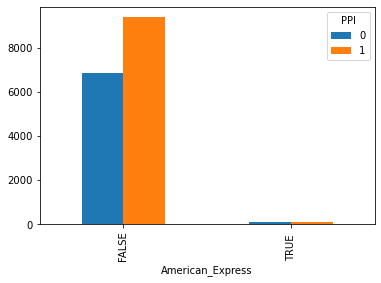

In [30]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['American_Express'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Employment_Status'>

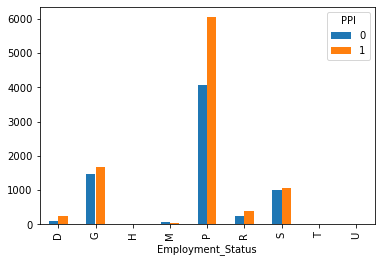

In [31]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Employment_Status'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Full_Part_Time_Empl_Ind'>

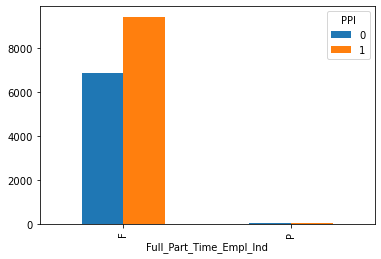

In [32]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Full_Part_Time_Empl_Ind'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Number_of_Dependants'>

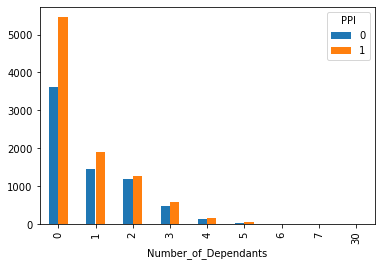

In [33]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Number_of_Dependants'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Mosaic_Class'>

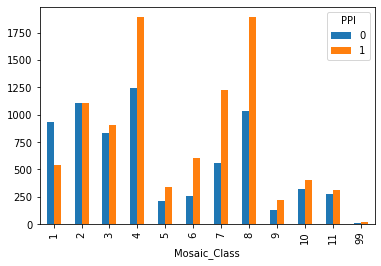

In [34]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Mosaic_Class'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Telephone_Indicator'>

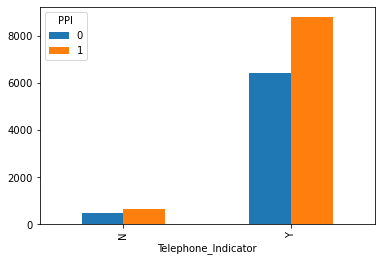

In [35]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Telephone_Indicator'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Worst_History_CT'>

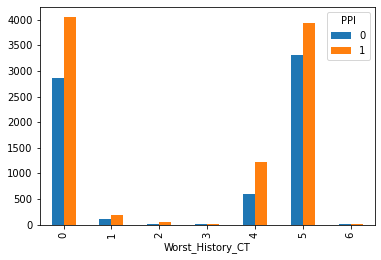

In [36]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Worst_History_CT'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

In [39]:
df= pd.read_excel('C:/Users/Sonali.Sengupta/Desktop/Mortgage Insurance Cross Sell - Dataset & Case Description/Mortgage Insurance Cross Sell - Dataset & Case Description/Dataset - v1.xlsx') 
df.shape
df.head()


,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,PPI_SINGLE,PPI_JOINT,PPI_LCI,Age Bucket,Credit Score Bucket,Time at Address Bucket,Time in Employment Bucket,Term Bucket,Unnamed: 64,Unnamed: 65
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,0,0,0,46-60,700-1000,2-3 years,> 5 years,2-3 years,NaN,NaN
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,0,0,1,46-60,700-1000,> 5 years,<1 year,> 5 years,NaN,NaN
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,0,1,0,46-60,1000-1300,> 5 years,2-3 years,> 5 years,NaN,NaN
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,0,0,1,26-35,700-1000,<1 year,1-2 years,4-5 years,NaN,NaN
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,1,0,0,46-60,1000-1300,2-3 years,> 5 years,4-5 years,NaN,NaN


   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Term Bucket'>

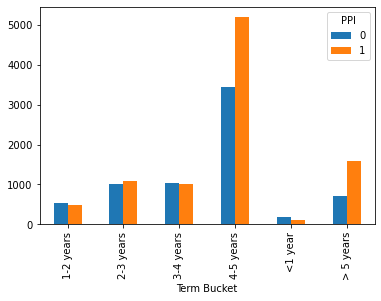

In [40]:
LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Term Bucket'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()

   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='APR Bucket'>

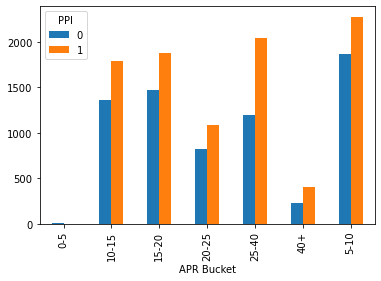

In [41]:
df= pd.read_excel('C:/Users/Sonali.Sengupta/Desktop/Mortgage Insurance Cross Sell - Dataset & Case Description/Mortgage Insurance Cross Sell - Dataset & Case Description/Dataset - v1.xlsx') 
df.shape
df.head()

LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['APR Bucket'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()


   Ref  Credit_Score Final_Grade  Term  Net_Advance   APR  Loan_Type  Mosaic  \
0    1           918           A    36       3000.0  14.4  UnSecured      46   
1    3           903           A   120      21000.0   7.9  secured        16   
2    4          1060           X    78       7200.0   7.9  secured        17   
3    6           839           B    60       8000.0  16.9  UnSecured      47   
4    7          1057           X    60       7650.0   7.4  UnSecured      55   

   Mosaic_Class  Time_at_Address  ... PPI_SINGLE PPI_JOINT  PPI_LCI  \
0             8              132  ...          0         0        0   
1             3              288  ...          0         0        1   
2             3              276  ...          0         1        0   
3             8               48  ...          0         0        1   
4            10              156  ...          1         0        0   

  Age Bucket Credit Score Bucket  Time at Address Bucket  \
0      46-60            700-1000

<AxesSubplot:xlabel='Total_outstanding_balance__mortg Bucket'>

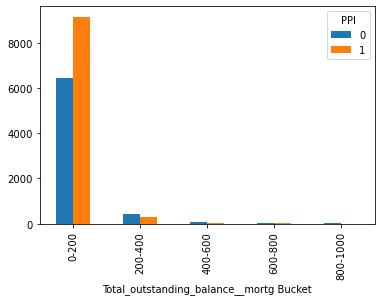

In [47]:
df= pd.read_excel('C:/Users/Sonali.Sengupta/Desktop/Mortgage Insurance Cross Sell - Dataset & Case Description/Mortgage Insurance Cross Sell - Dataset & Case Description/Dataset - v1.xlsx') 
df.head()

LoanData=pd.DataFrame(data=df)
print(LoanData.head())
CrosstabResult=pd.crosstab(index=LoanData['Total_outstanding_balance__mortg Bucket'],columns=LoanData['PPI'])
print(CrosstabResult)
 
%matplotlib inline 
CrosstabResult.plot.bar()


In [176]:
df= pd.read_excel('C:/Users/Sonali.Sengupta/Desktop/Mortgage Insurance Cross Sell - Dataset & Case Description/Mortgage Insurance Cross Sell - Dataset & Case Description/Dataset - v1.xlsx').drop(columns=['code', 'prdt_desc','category'])




Features= ['Age','Final_Grade1','Term','APR','Number_of_Dependants','Total_outstanding_balance__mortg Bucket' ,'Worst_status_L6m', 'Total___of_accounts']

df = df[['Age','Final_Grade1','Term','APR','Number_of_Dependants','Total_outstanding_balance__mortg Bucket' ,'Worst_status_L6m', 'Total___of_accounts','PPI']]


<ipython-input-176-541efe0d2343>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Age Bucket'] = df['Age Bucket'].str.replace(r'[^\d.]+', '')
<ipython-input-176-541efe0d2343>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Term Bucket'] = df['Term Bucket'].str.replace(r'[^\d.]+', '')
<ipython-input-176-541efe0d2343>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['APR Bucket'] = df['APR Bucket'].str.replace(r'[^\d.]+', '')
<ipython-input-176-541efe0d2343>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Total_outstanding_balance__mortg Bucket'] = df['Total_outstanding_balance__mortg Bucket'].str.replace(r'[^\d.]+', '')


In [178]:
df.head()

,Age Bucket,Final_Grade1,Term Bucket,APR Bucket,Number_of_Dependants,Total_outstanding_balance__mortg Bucket,Worst_status_L6m,Total___of_accounts,PPI
0,4660,1,23,1015,0,200,0,6,0
1,4660,1,5,510,0,200,1,8,1
2,4660,10,5,510,0,200,0,7,1
3,2635,2,45,1520,0,200,1,9,1
4,4660,10,45,510,2,200,0,6,1


In [179]:

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(df[Features],df['PPI'],
                                   test_size = 0.3, random_state = 101) 
X_train.shape,X_test.shape


((11468, 8), (4915, 8))

In [180]:

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(df[Features],df['PPI'],
                                   test_size = 0.3, random_state = 101) 
X_train.shape,X_test.shape


((11468, 8), (4915, 8))

In [183]:
model = LogisticRegression()
model.fit(X_train,Y_train) 
performance_met(model,X_train,Y_train,X_test,Y_test)


NameError: name 'performance_met' is not defined

In [184]:
def performance_met(model,X_train,Y_train,X_test,Y_test):

    acc_train=accuracy_score(Y_train, model.predict(X_train))

    f1_train=f1_score(Y_train, model.predict(X_train))

    acc_test=accuracy_score(Y_test, model.predict(X_test))

    f1_test=f1_score(Y_test, model.predict(X_test))

    print("train score: accuracy:{} f1:{}".format(acc_train,f1_train))

    print("test score: accuracy:{} f1:{}".format(acc_test,f1_test))

In [185]:
model = LogisticRegression()
model.fit(X_train,Y_train) 
performance_met(model,X_train,Y_train,X_test,Y_test)


train score: accuracy:0.5886815486571328 f1:0.7328840817713348
test score: accuracy:0.5861648016276704 f1:0.7300955414012739


In [187]:
model_DT=DecisionTreeClassifier(random_state=1) 
model_DT.fit(X_train,Y_train) 
performance_met(model_DT,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.8709452389257063 f1:0.8861188057863958
test score: accuracy:0.5560528992878943 f1:0.6052821997105644


In [188]:
Forest= RandomForestClassifier(random_state=1) 
Forest.fit(X_train,Y_train) 
performance_met(Forest,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.8709452389257063 f1:0.8914000587026709
test score: accuracy:0.5837232960325535 f1:0.655323450134771


In [189]:
df= pd.read_excel('C:/Users/Sonali.Sengupta/Desktop/Mortgage Insurance Cross Sell - Dataset & Case Description/Mortgage Insurance Cross Sell - Dataset & Case Description/Dataset - v1.xlsx').drop(columns=['code', 'prdt_desc','category'])




Features= ['Age','Final_Grade1','Term','APR','Number_of_Dependants','Total_outstanding_balance__mortg Bucket' ,'Worst_status_L6m', 'Total___of_accounts']

df = df[['Age','Final_Grade1','Term','APR','Number_of_Dependants','Total_outstanding_balance__mortg Bucket' ,'Worst_status_L6m', 'Total___of_accounts','PPI']]


In [190]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(df[Features],df['PPI'],
                                   test_size = 0.3, random_state = 101) 
X_train.shape,X_test.shape


def performance_met(model,X_train,Y_train,X_test,Y_test):

    acc_train=accuracy_score(Y_train, model.predict(X_train))

    f1_train=f1_score(Y_train, model.predict(X_train))

    acc_test=accuracy_score(Y_test, model.predict(X_test))

    f1_test=f1_score(Y_test, model.predict(X_test))

    print("train score: accuracy:{} f1:{}".format(acc_train,f1_train))

    print("test score: accuracy:{} f1:{}".format(acc_test,f1_test))





In [191]:
model = LogisticRegression()
model.fit(X_train,Y_train) 
performance_met(model,X_train,Y_train,X_test,Y_test)


ValueError: could not convert string to float: '0-200'

In [192]:
df= pd.read_excel('C:/Users/Sonali.Sengupta/Desktop/Mortgage Insurance Cross Sell - Dataset & Case Description/Mortgage Insurance Cross Sell - Dataset & Case Description/Dataset - v1.xlsx').drop(columns=['code', 'prdt_desc','category'])




Features= ['Age','Final_Grade1','Term','APR','Number_of_Dependants','Total_outstanding_balance__mortg' ,'Worst_status_L6m', 'Total___of_accounts']

df = df[['Age','Final_Grade1','Term','APR','Number_of_Dependants','Total_outstanding_balance__mortg' ,'Worst_status_L6m', 'Total___of_accounts','PPI']]


In [193]:
df.head()

,Age,Final_Grade1,Term,APR,Number_of_Dependants,Total_outstanding_balance__mortg Bucket,Worst_status_L6m,Total___of_accounts,PPI
0,46,1,36,14.4,0,0-200,0,6,0
1,59,1,120,7.9,0,0-200,1,8,1
2,56,10,78,7.9,0,0-200,0,7,1
3,33,2,60,16.9,0,0-200,1,9,1
4,49,10,60,7.4,2,0-200,0,6,1


In [194]:
df= pd.read_excel('C:/Users/Sonali.Sengupta/Desktop/Mortgage Insurance Cross Sell - Dataset & Case Description/Mortgage Insurance Cross Sell - Dataset & Case Description/Dataset - v1.xlsx').drop(columns=['code', 'prdt_desc','category'])




Features= ['Age','Final_Grade1','Term','APR','Number_of_Dependants','Total_outstanding_balance__mortg' ,'Worst_status_L6m', 'Total___of_accounts']

df = df[['Age','Final_Grade1','Term','APR','Number_of_Dependants','Total_outstanding_balance__mortg' ,'Worst_status_L6m', 'Total___of_accounts','PPI']]


In [195]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(df[Features],df['PPI'],
                                   test_size = 0.3, random_state = 101) 
X_train.shape,X_test.shape


def performance_met(model,X_train,Y_train,X_test,Y_test):

    acc_train=accuracy_score(Y_train, model.predict(X_train))

    f1_train=f1_score(Y_train, model.predict(X_train))

    acc_test=accuracy_score(Y_test, model.predict(X_test))

    f1_test=f1_score(Y_test, model.predict(X_test))

    print("train score: accuracy:{} f1:{}".format(acc_train,f1_train))

    print("test score: accuracy:{} f1:{}".format(acc_test,f1_test))



In [196]:
model = LogisticRegression()
model.fit(X_train,Y_train) 
performance_met(model,X_train,Y_train,X_test,Y_test)


train score: accuracy:0.6302755493547262 f1:0.7173333333333334
test score: accuracy:0.6205493387589013 f1:0.7093657472339098


C:\Users\Sonali.Sengupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [197]:
model_DT=DecisionTreeClassifier(random_state=1) 
model_DT.fit(X_train,Y_train) 
performance_met(model_DT,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.9985176142309033 f1:0.9987197831161985
test score: accuracy:0.5725330620549339 f1:0.6247544204322201


In [198]:
Forest= RandomForestClassifier(random_state=1) 
Forest.fit(X_train,Y_train) 
performance_met(Forest,X_train,Y_train,X_test,Y_test)

train score: accuracy:0.9985176142309033 f1:0.9987226688706891
test score: accuracy:0.6262461851475076 f1:0.6945968412302577
